In [2]:
import pandas as pd
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
excel_dir = Path("/Users/rutmehta/Developer/NJBDA/course_equiv analysis/excels")

In [4]:
def extract_data_from_excel(file_path):
    # Read the Excel file
    try:
        # Try with default sheet (0)
        df = pd.read_excel(file_path)
        
        # Look for required columns (case-insensitive search)
        required_cols = ['SI', 'Course ID', 'Course Title', 'RI', "EQ 'FN'"]
        found_cols = []
        
        # Create a mapping between required column names and actual column names in the file
        col_mapping = {}
        for req_col in required_cols:
            for col in df.columns:
                # Check if column name contains the required name (case-insensitive)
                if req_col.lower() in col.lower():
                    col_mapping[req_col] = col
                    found_cols.append(col)
                    break
        
        # Check if all required columns were found
        if len(found_cols) < len(required_cols):
            missing = set(required_cols) - set(col_mapping.keys())
            print(f"Warning: Couldn't find these columns in {file_path.name}: {missing}")
            print(f"Available columns: {df.columns.tolist()}")
            
        # Select only the required columns that were found
        if found_cols:
            df_selected = df[found_cols]
            return df_selected
        else:
            print(f"No required columns found in {file_path.name}")
            return pd.DataFrame()
            
    except Exception as e:
        print(f"Error processing {file_path.name}: {str(e)}")
        return pd.DataFrame()

In [5]:
all_dataframes = {}
    
# Iterate through all Excel files in the directory
excel_files = list(excel_dir.glob("*.xlsx")) + list(excel_dir.glob("*.xls"))

if not excel_files:
    print(f"No Excel files found in {excel_dir}")

print(f"Found {len(excel_files)} Excel files to process.")

# Process each Excel file
for file_path in excel_files:
    file_name = file_path.name
    print(f"Processing {file_name}...")
    
    # Extract data from the file
    df = extract_data_from_excel(file_path)
    
    # Store DataFrame in dictionary with filename as key
    if not df.empty:
        all_dataframes[file_name] = df
        print(f"  Extracted {len(df)} rows with {len(df.columns)} columns")
    else:
        print(f"  No data extracted from {file_name}")

# Example of how to access each DataFrame
print("\nSummary of extracted DataFrames:")
for file_name, df in all_dataframes.items():
    print(f"{file_name}: {df.shape[0]} rows, {df.shape[1]} columns")
    # Display first few rows of each DataFrame
    if not df.empty:
        print(df.head(3))
        print()

Found 10 Excel files to process.
Processing (2025.03.19) Centenary Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24337 rows with 5 columns
Processing (2025.03.19) Kean Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24360 rows with 5 columns
Processing (2025.03.19) FDU-Metropolitan Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24290 rows with 5 columns
Processing (2025.03.19) Montclair Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24347 rows with 5 columns
Processing (2025.03.19) NJCU Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24360 rows with 5 columns
Processing (2025.03.19) Rowan Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24341 rows with 5 columns
Processing (2025.03.19) Rider Master Evaluation Matrix (Latest SI, Latest RI).xlsx...
  Extracted 24358 rows with 5 columns
Processing (2025.03.19) FDU-Florham Master Evaluation Matrix (Latest SI, Latest RI

In [20]:
# Define regex patterns for CS, Math, and Data Science courses
cs_pattern = r'^(CS|COMP|CMPS|CSCI|CPE|CIS|IT|CSE|CPS|INF|COMS|CSIT)\d'  # Computer Science
math_pattern = r'^(MATH|MTH|MAT|MA)\d'  # Mathematics
data_pattern = r'^(DATA|DS|DSC|STAT|STA|DSCI)\d'  # Data Science

# Filter each dataframe to keep only CS, Math, and Data Science courses
filtered_dataframes = {}

for file_name, df in all_dataframes.items():
    # Get the Course ID column name (it might be slightly different in some files)
    course_id_col = [col for col in df.columns if 'Course ID' in col][0]
    
    # Create a combined filter for CS, Math, and Data Science courses
    cs_filter = df[course_id_col].str.match(cs_pattern, case=False)
    math_filter = df[course_id_col].str.match(math_pattern, case=False)
    data_filter = df[course_id_col].str.match(data_pattern, case=False)
    
    # Combine all filters with logical OR
    combined_filter = cs_filter | math_filter | data_filter
    
    # Apply the filter to keep only CS, Math, and Data Science courses
    filtered_df = df[combined_filter].copy()
    
    # Store the filtered dataframe
    filtered_dataframes[file_name] = filtered_df
    
    # Print summary of filtering for this institution
    print(f"{file_name}:")
    print(f"  Original: {len(df)} courses")
    print(f"  Filtered: {len(filtered_df)} courses")
    print(f"  Courses removed: {len(df) - len(filtered_df)} courses")
    
    # Count courses by discipline
    cs_count = sum(filtered_df[course_id_col].str.match(cs_pattern, case=False))
    math_count = sum(filtered_df[course_id_col].str.match(math_pattern, case=False))
    data_count = sum(filtered_df[course_id_col].str.match(data_pattern, case=False))
    
    print(f"  CS courses: {cs_count}")
    print(f"  Math courses: {math_count}")
    print(f"  Data Science courses: {data_count}")


(2025.03.19) Centenary Master Evaluation Matrix (Latest SI, Latest RI).xlsx:
  Original: 24337 courses
  Filtered: 1680 courses
  Courses removed: 22657 courses
  CS courses: 902
  Math courses: 768
  Data Science courses: 10
(2025.03.19) Kean Master Evaluation Matrix (Latest SI, Latest RI).xlsx:
  Original: 24360 courses
  Filtered: 1682 courses
  Courses removed: 22678 courses
  CS courses: 903
  Math courses: 769
  Data Science courses: 10
(2025.03.19) FDU-Metropolitan Master Evaluation Matrix (Latest SI, Latest RI).xlsx:
  Original: 24290 courses
  Filtered: 1682 courses
  Courses removed: 22608 courses
  CS courses: 903
  Math courses: 769
  Data Science courses: 10
(2025.03.19) Montclair Master Evaluation Matrix (Latest SI, Latest RI).xlsx:
  Original: 24347 courses
  Filtered: 1680 courses
  Courses removed: 22667 courses
  CS courses: 903
  Math courses: 767
  Data Science courses: 10
(2025.03.19) NJCU Master Evaluation Matrix (Latest SI, Latest RI).xlsx:
  Original: 24360 cour

In [21]:
# Display a sample from each filtered dataframe
print("\nSamples from filtered dataframes:")
for file_name, df in filtered_dataframes.items():
    print(f"{file_name} (first 3 rows of {len(df)} total):")
    if not df.empty:
        print(df.head(3))
    else:
        print("  No matching courses found")
    print()


Samples from filtered dataframes:
(2025.03.19) Centenary Master Evaluation Matrix (Latest SI, Latest RI).xlsx (first 3 rows of 1680 total):
     SI Course ID                             Course Title  RI EQ 'FN'
686  AT   MATH070                       MATH SKILLS REVIEW  CE     NaN
687  AT   MATH071                        FOUNDATIONAL MATH  CE     NaN
688  AT   MATH073  INTRODUCTION TO ALGEBRA I - PRE-ALGEBRA  CE     NaN

(2025.03.19) Kean Master Evaluation Matrix (Latest SI, Latest RI).xlsx (first 3 rows of 1682 total):
     SI Course ID                             Course Title  RI  \
688  AT   MATH070                       MATH SKILLS REVIEW  KE   
689  AT   MATH071                        FOUNDATIONAL MATH  KE   
690  AT   MATH073  INTRODUCTION TO ALGEBRA I - PRE-ALGEBRA  KE   

              EQ 'FN'  
688               NaN  
689  MATH0901 'K1,K3'  
690               NaN  

(2025.03.19) FDU-Metropolitan Master Evaluation Matrix (Latest SI, Latest RI).xlsx (first 3 rows of 1682 total)

In [22]:
# Create a combined dataframe of non-transferring courses
non_transferring_courses = []

for file_name, df in filtered_dataframes.items():
    # Get the EQ column name (it might be slightly different in some files)
    eq_col = [col for col in df.columns if "EQ 'FN'" in col][0]
    
    # Get the RI column name
    ri_col = [col for col in df.columns if 'RI' == col][0]
    
    # Filter for courses with NaN in the EQ column
    non_transferring = df[df[eq_col].isna()].copy()
    
    # Add to our list of dataframes
    non_transferring_courses.append(non_transferring)

# Combine all the non-transferring courses into a single dataframe
if non_transferring_courses:
    combined_non_transferring = pd.concat(non_transferring_courses, ignore_index=True)
    
    # Count by Receiving Institution (RI)
    ri_counts = combined_non_transferring['RI'].value_counts()
    print("\nCounts by Receiving Institution (RI):")
    for ri, count in ri_counts.items():
        print(f"  {ri}: {count} courses")
    
    # Display the first few rows
    print("\nSample of combined non-transferring courses:")
    print(combined_non_transferring.head())
    
    combined_non_transferring = combined_non_transferring.sort_values(by = ['SI', "EQ 'FN'"])
    # Optional: save to CSV
    combined_non_transferring.to_csv("non_transferring_cs_math_data_courses.csv", index=False)
else:
    print("No non-transferring courses found.")


Counts by Receiving Institution (RI):
  NI: 1201 courses
  RI: 615 courses
  MO: 452 courses
  NU: 419 courses
  RM: 365 courses
  RO: 314 courses
  KE: 280 courses
  FD: 231 courses
  FM: 221 courses
  CE: 186 courses

Sample of combined non-transferring courses:
   SI Course ID                             Course Title  RI EQ 'FN'
0  AT   MATH070                       MATH SKILLS REVIEW  CE     NaN
1  AT   MATH071                        FOUNDATIONAL MATH  CE     NaN
2  AT   MATH073  INTRODUCTION TO ALGEBRA I - PRE-ALGEBRA  CE     NaN
3  AT   MATH074               INTRODUCTION TO ALGEBRA II  CE     NaN
4  AT   MATH080                       ELEMENTARY ALGEBRA  CE     NaN


In [23]:
# Group by SI, Course ID, and Course Title to analyze the pattern
course_analysis = combined_non_transferring.groupby(['SI', 'Course ID', 'Course Title']).agg(
    count=('RI', 'count'),  # Count of receiving institutions
    non_transferring_institutions=('RI', lambda x: list(sorted(x)))  # List of RIs where course doesn't transfer
).reset_index()

# Sort by SI and then by count (descending)
course_analysis = course_analysis.sort_values(by=['SI', 'count'], ascending=[True, False])

# Rename the columns for clarity
course_analysis = course_analysis.rename(columns={
    'count': 'Number_of_Non_Transfers',
    'non_transferring_institutions': 'Non_Transferring_To'
})

# Display the results
print("Analysis of Non-Transferring Courses:")
print(f"Total unique courses: {len(course_analysis)}")
print("\nSample of the analysis (first 10 rows):")
print(course_analysis.head(10))

# Optional: Calculate additional statistics
si_summary = course_analysis.groupby('SI').agg(
    unique_courses=('Course ID', 'count'),
    avg_non_transfers=('Number_of_Non_Transfers', 'mean'),
    max_non_transfers=('Number_of_Non_Transfers', 'max')
).reset_index()

print("\nSummary by Sending Institution (SI):")
print(si_summary)

# Optional: save to CSV
course_analysis.to_csv("non_transferring_course_analysis.csv", index=False)

Analysis of Non-Transferring Courses:
Total unique courses: 1326

Sample of the analysis (first 10 rows):
   SI Course ID                             Course Title  \
0  AT   MATH070                       MATH SKILLS REVIEW   
2  AT   MATH073  INTRODUCTION TO ALGEBRA I - PRE-ALGEBRA   
3  AT   MATH074               INTRODUCTION TO ALGEBRA II   
4  AT   MATH080                       ELEMENTARY ALGEBRA   
1  AT   MATH071                        FOUNDATIONAL MATH   
5  AT   MATH099           ACCELERATED ELEMENTARY ALGEBRA   
6  AT   MATH119                     INTERMEDIATE ALGEBRA   
9  AT   MATH210                               STATISTICS   
7  AT   MATH121              APPLICATIONS OF MATHEMATICS   
8  AT   MATH128                             TRIGONOMETRY   

   Number_of_Non_Transfers                       Non_Transferring_To  
0                       10  [CE, FD, FM, KE, MO, NI, NU, RI, RM, RO]  
2                        9      [CE, FD, FM, KE, MO, NI, NU, RI, RO]  
3                   

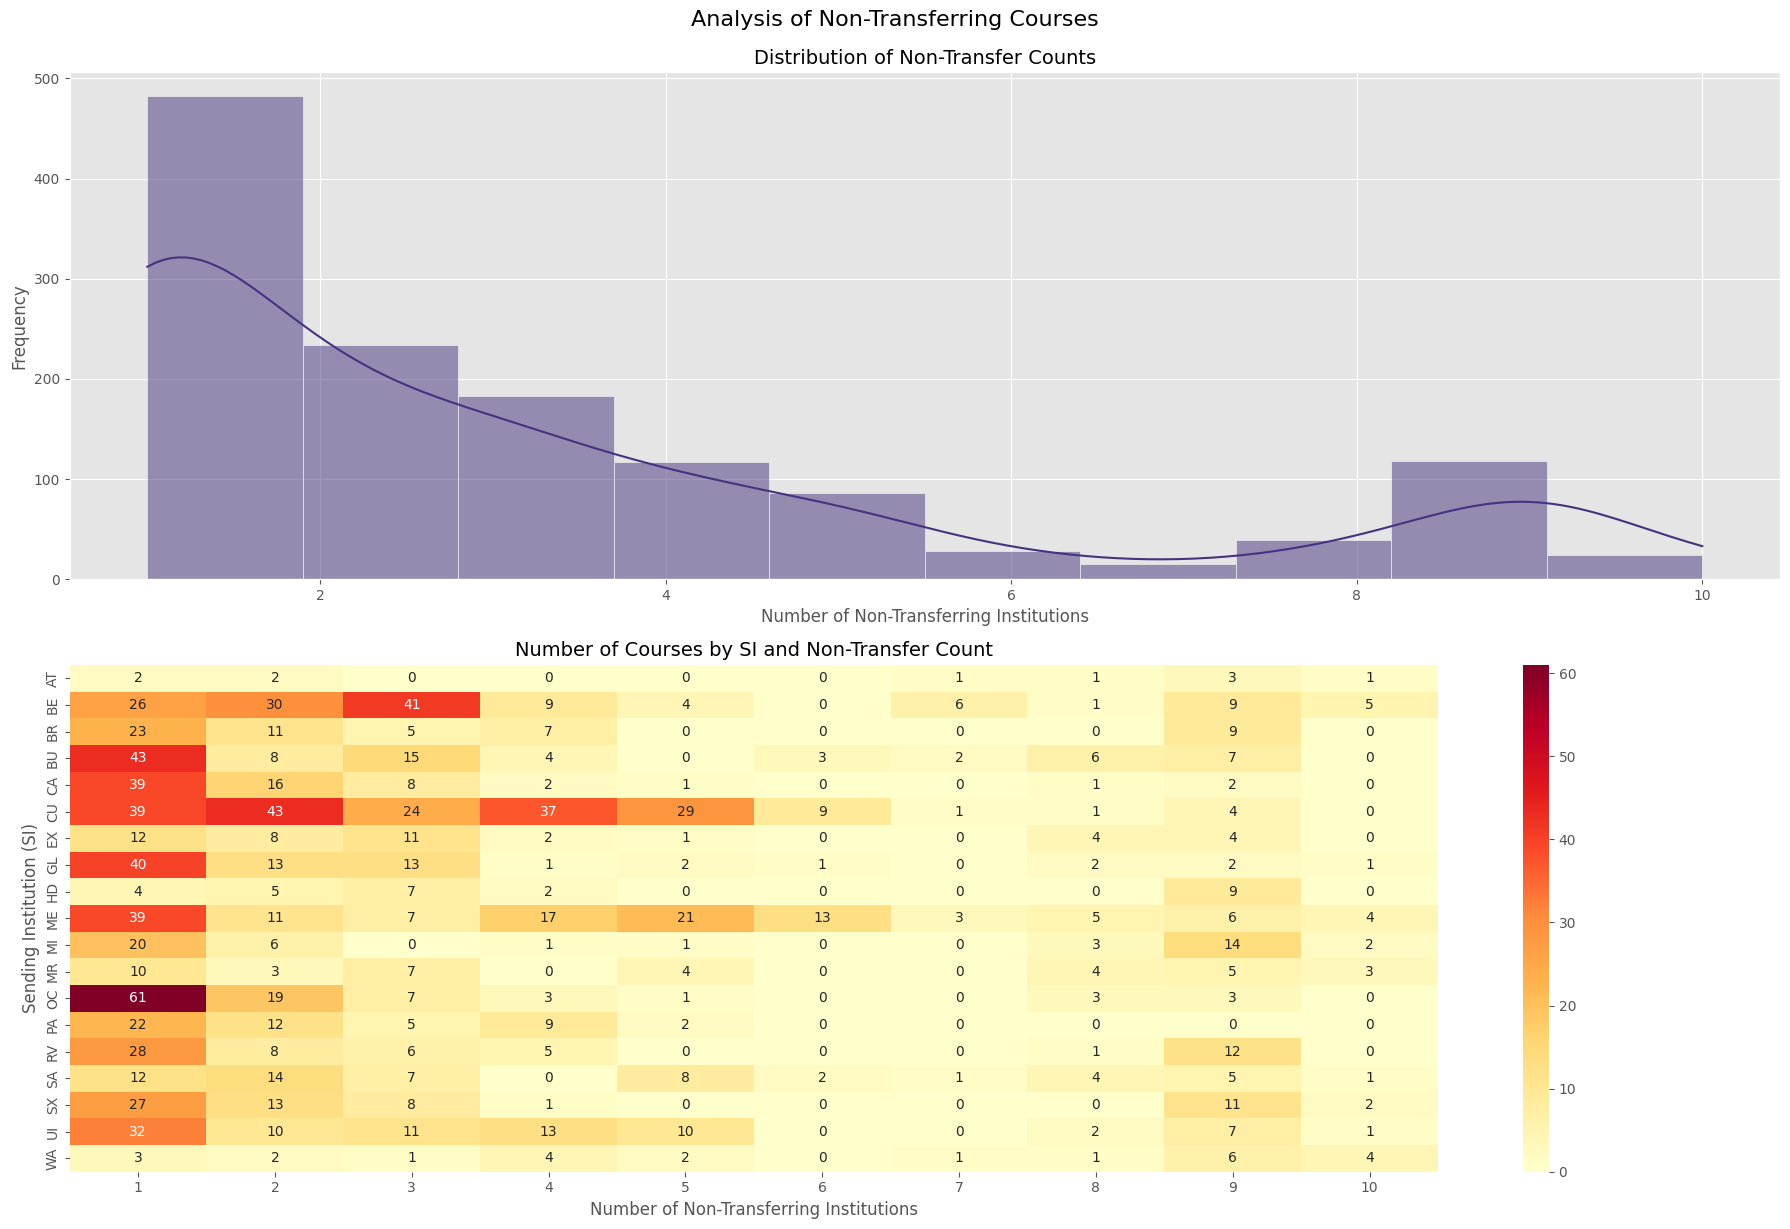

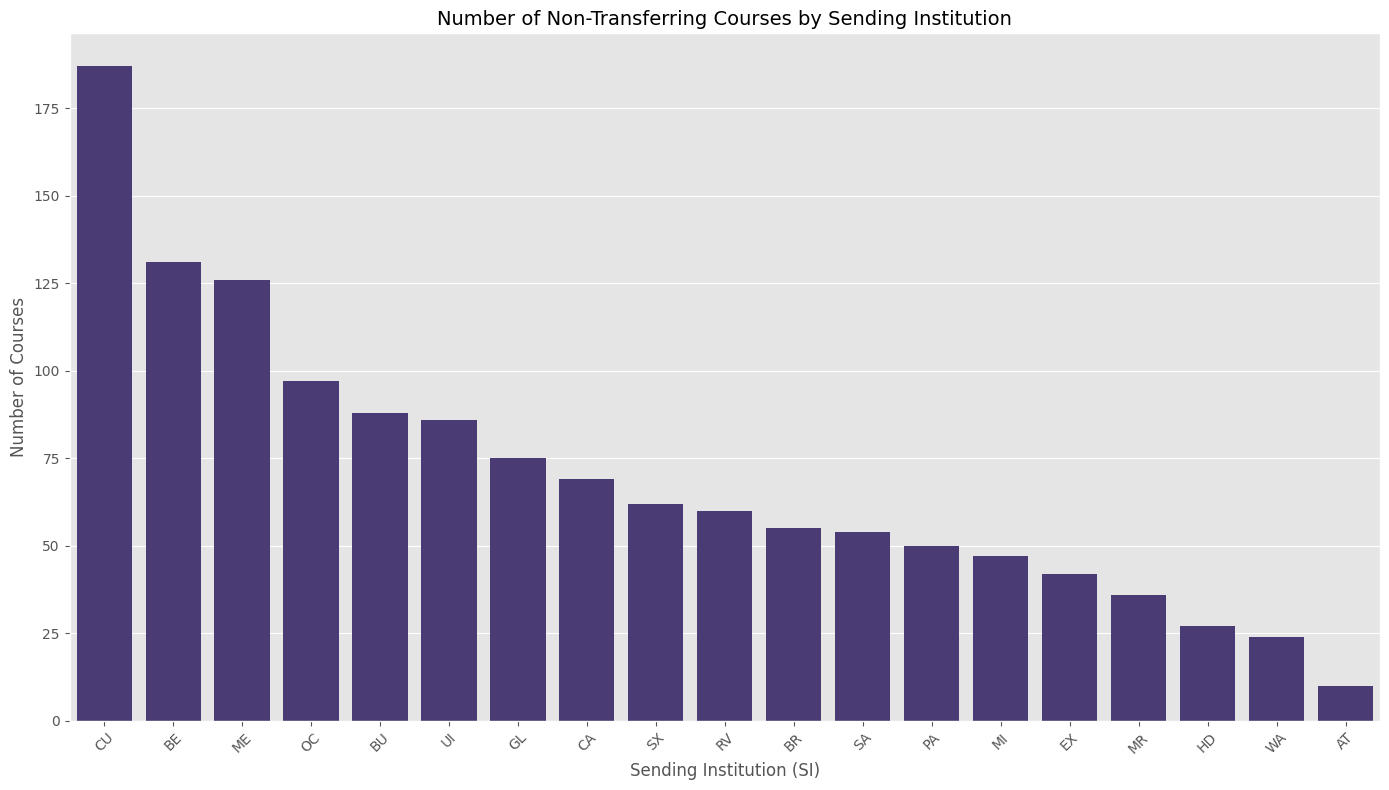

In [25]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
plt.style.use('ggplot')
sns.set_palette("viridis")

# Create a figure with multiple subplots for different visualizations
fig = plt.figure(figsize=(18, 12))

# # 1. Top 20 courses with highest non-transfer counts
# ax1 = plt.subplot(2, 2, 1)
# top_courses = course_analysis.sort_values('Number_of_Non_Transfers', ascending=False).head(20)
# sns.barplot(x='Number_of_Non_Transfers', y=top_courses.index, data=top_courses, ax=ax1)
# ax1.set_title('Top 20 Courses with Highest Non-Transfer Counts', fontsize=14)
# ax1.set_xlabel('Number of Non-Transferring Institutions', fontsize=12)
# ax1.set_ylabel('')

# Create custom y-tick labels that include SI, Course ID, and a truncated title
# y_labels = [f"{row['SI']} {row['Course ID']}: {row['Course Title'][:30]}..." 
#             if len(row['Course Title']) > 30 else f"{row['SI']} {row['Course ID']}: {row['Course Title']}" 
#             for _, row in top_courses.iterrows()]
# ax1.set_yticks(range(len(y_labels)))
# ax1.set_yticklabels(y_labels)

# 2. Distribution of non-transfer counts
ax2 = plt.subplot(2, 1, 1)
sns.histplot(course_analysis['Number_of_Non_Transfers'], bins=10, kde=True, ax=ax2)
ax2.set_title('Distribution of Non-Transfer Counts', fontsize=14)
ax2.set_xlabel('Number of Non-Transferring Institutions', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# 3. Heatmap of non-transfer counts by sending institution (SI)
ax3 = plt.subplot(2, 1, 2)
# Create a pivot table to count courses by SI and non-transfer count
pivot_data = pd.crosstab(
    course_analysis['SI'], 
    course_analysis['Number_of_Non_Transfers']
)
# Plot the heatmap
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='d', ax=ax3)
ax3.set_title('Number of Courses by SI and Non-Transfer Count', fontsize=14)
ax3.set_xlabel('Number of Non-Transferring Institutions', fontsize=12)
ax3.set_ylabel('Sending Institution (SI)', fontsize=12)

plt.tight_layout()
plt.suptitle('Analysis of Non-Transferring Courses', fontsize=16, y=1.02)
plt.savefig('non_transferring_courses_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# # Create an additional pie chart to show proportion of courses by non-transfer count
# plt.figure(figsize=(12, 8))
# # Group by number of non-transfers
# count_groups = course_analysis.groupby('Number_of_Non_Transfers').size()
# # Plot pie chart
# plt.pie(count_groups, labels=[f'{count} institutions' for count in count_groups.index], 
#         autopct='%1.1f%%', startangle=90, shadow=True, 
#         explode=[0.1 if i == count_groups.index.max() else 0 for i in count_groups.index])
# plt.axis('equal')
# plt.title('Proportion of Courses by Number of Non-Transferring Institutions', fontsize=14)
# plt.savefig('non_transferring_courses_pie.png', dpi=300, bbox_inches='tight')
# plt.show()

# Create a bar chart showing the top sending institutions with most non-transferring courses
plt.figure(figsize=(14, 8))
si_counts = course_analysis['SI'].value_counts().sort_values(ascending=False)
sns.barplot(x=si_counts.index, y=si_counts.values)
plt.title('Number of Non-Transferring Courses by Sending Institution', fontsize=14)
plt.xlabel('Sending Institution (SI)', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('non_transferring_courses_by_si.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

# Count the number of courses not transferred to each receiving institution
ri_not_transferred_counts = combined_non_transferring['RI'].value_counts().sort_values(ascending=False)

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create a bar chart with custom colors
ax = sns.barplot(x=ri_not_transferred_counts.index, y=ri_not_transferred_counts.values, 
                palette='viridis')

# Add labels and title
plt.title('Number of Courses Not Transferred to Each Receiving Institution', fontsize=16)
plt.xlabel('Receiving Institution (RI)', fontsize=14)
plt.ylabel('Number of Non-Transferring Courses', fontsize=14)

# Add data labels on top of each bar
for i, v in enumerate(ri_not_transferred_counts.values):
    ax.text(i, v + 20, str(v), ha='center', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to ensure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('non_transferred_by_institution.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Create a second visualization: Heatmap showing which sending institutions have most courses not transferring to which receiving institutions
# Create a cross-tabulation of SI (rows) and RI (columns)
heatmap_data = pd.crosstab(combined_non_transferring['SI'], combined_non_transferring['RI'])

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Number of Non-Transferring Courses from Each Sending Institution (SI) to Each Receiving Institution (RI)', fontsize=16)
plt.xlabel('Receiving Institution (RI)', fontsize=14)
plt.ylabel('Sending Institution (SI)', fontsize=14)

# Tight layout to ensure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('non_transferred_heatmap.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Optional: Create a pie chart showing the distribution of receiving institutions with most non-transferring courses
plt.figure(figsize=(10, 10))
plt.pie(ri_not_transferred_counts, labels=ri_not_transferred_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.1 if i == ri_not_transferred_counts.index[0] else 0 for i in ri_not_transferred_counts.index],
        colors=sns.color_palette('viridis', len(ri_not_transferred_counts)))
plt.title('Distribution of Non-Transferring Courses by Receiving Institution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the figure
plt.savefig('non_transferred_pie.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
def load_equivalency_data():
    """
    Load all equivalency data from Excel files in the specified directory
    and combine them into a single DataFrame.
    """
    all_data = []
    
    # Iterate through all Excel files in the directory
    excel_files = list(excel_dir.glob("*.xlsx")) + list(excel_dir.glob("*.xls"))
    
    for file_path in excel_files:
        try:
            # Read the Excel file
            df = pd.read_excel(file_path)
            
            # Look for required columns (case-insensitive search)
            required_cols = ['SI', 'Course ID', 'Course Title', 'RI', "EQ 'FN'", 'Stat']
            
            # Create a mapping between required column names and actual column names in the file
            col_mapping = {}
            for req_col in required_cols:
                for col in df.columns:
                    # Check if column name contains the required name (case-insensitive)
                    if req_col.lower() in col.lower():
                        col_mapping[req_col] = col
                        break
            
            # Check if the 'Stat' column is found
            if 'Stat' not in col_mapping:
                print(f"Warning: 'Stat' column not found in {file_path.name}. Skipping file.")
                continue
                
            # Select only the required columns that were found
            if col_mapping:
                selected_cols = list(col_mapping.values())
                df_selected = df[selected_cols]
                
                # Rename columns to standardized names
                inverse_mapping = {v: k for k, v in col_mapping.items()}
                df_selected = df_selected.rename(columns=inverse_mapping)
                
                all_data.append(df_selected)
            else:
                print(f"No required columns found in {file_path.name}")
                
        except Exception as e:
            print(f"Error processing {file_path.name}: {str(e)}")
    
    # Combine all DataFrames
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

In [6]:
def create_equivalency_matrix(combined_df):
    """
    Create a matrix showing course equivalencies between sending and receiving institutions.
    Only includes courses with Status "Y".
    """
    # Filter for courses with Status "Y"
    if 'Stat' in combined_df.columns:
        status_y_df = combined_df[combined_df['Stat'] == 'Y']
    else:
        print("'Stat' column not found in the combined data. Proceeding with all courses.")
        status_y_df = combined_df
    
    if status_y_df.empty:
        print("No courses with Status 'Y' found.")
        return None
    
    # Create unique identifiers for SI and RI courses
    status_y_df['SI_Course'] = status_y_df['SI'] + ' ' + status_y_df['Course ID'] + ': ' + status_y_df['Course Title']
    
    # Get unique SI courses and RI institutions
    si_courses = status_y_df['SI_Course'].unique()
    ri_institutions = status_y_df['RI'].unique()
    
    # Create a matrix to store the equivalencies
    matrix = pd.DataFrame(index=si_courses, columns=ri_institutions)
    
    # Fill the matrix with equivalent course IDs from receiving institutions
    for _, row in status_y_df.iterrows():
        si_course = row['SI_Course']
        ri = row['RI']
        eq_fn = row["EQ 'FN'"]
        
        # If there's an equivalency (not NaN), add it to the matrix
        if pd.notna(eq_fn):
            matrix.at[si_course, ri] = eq_fn
    
    return matrix

In [7]:
def visualize_equivalency_matrix(matrix):
    """
    Create a visualization of the equivalency matrix.
    """
    if matrix is None:
        print("No matrix to visualize.")
        return
    
    # Replace NaN values with empty strings for better visualization
    matrix_viz = matrix.fillna('')
    
    # Create a binary matrix for the heatmap (1 if there's an equivalency, 0 otherwise)
    binary_matrix = matrix.notna().astype(int)
    
    # Set up the figure size based on the matrix dimensions
    fig_height = max(10, len(matrix) * 0.3)
    fig_width = max(10, len(matrix.columns) * 0.8)
    
    plt.figure(figsize=(fig_width, fig_height))
    
    # Create the heatmap
    ax = sns.heatmap(binary_matrix, cmap="Blues", cbar=False, linewidths=.5, linecolor='lightgray')
    
    # Add course equivalency text to cells
    for i, si_course in enumerate(matrix.index):
        for j, ri in enumerate(matrix.columns):
            eq_course = matrix.iloc[i, j]
            if pd.notna(eq_course):
                text_color = 'black'
                plt.text(j + 0.5, i + 0.5, eq_course, 
                         ha="center", va="center", color=text_color, fontsize=8)
    
    # Set title and labels
    plt.title('Course Equivalency Matrix (SI Courses to RI Courses)', fontsize=14, pad=20)
    plt.xlabel('Receiving Institution (RI)', fontsize=12)
    plt.ylabel('Sending Institution (SI) Course', fontsize=12)
    
    # Rotate the tick labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=8)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    output_path = Path("/Users/rutmehta/Developer/NJBDA/course_equivalency_matrix.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Matrix visualization saved to {output_path}")
    
    plt.close()
    
    return output_path

In [8]:
print("Loading equivalency data...")
combined_df = load_equivalency_data()

if combined_df.empty:
    print("No data loaded. Please check the Excel files.")


print(f"Loaded {len(combined_df)} records from Excel files.")

# Create the equivalency matrix
print("Creating equivalency matrix...")
matrix = create_equivalency_matrix(combined_df)

# Visualize the matrix
print("Visualizing equivalency matrix...")
output_path = visualize_equivalency_matrix(matrix)

if output_path:
    print(f"Equivalency matrix visualization created successfully at {output_path}")
else:
    print("Failed to create equivalency matrix visualization.")
    
# Also save the matrix to CSV for easier reference
if matrix is not None:
    csv_path = Path("/Users/rutmehta/Developer/NJBDA/course_equivalency_matrix.csv")
    matrix.to_csv(csv_path)
    print(f"Matrix data saved to {csv_path}")

Loading equivalency data...
Loaded 243409 records from Excel files.
Creating equivalency matrix...


/var/folders/hh/zq17rsmd6cbgvr4kxpgtd6440000gn/T/ipykernel_69127/166216836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_y_df['SI_Course'] = status_y_df['SI'] + ' ' + status_y_df['Course ID'] + ': ' + status_y_df['Course Title']


Visualizing equivalency matrix...


KeyboardInterrupt: 

: 